In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()

# 2

F{δ(t)} = ∫ δ(t) * exp(-jωt) dt (from -∞ to ∞)

In [121]:
t, ω, ω0 = symbols('t ω ω0', real=True)

delta_t = DiracDelta(t)

# Fourier Transform definition
F_delta_t = integrate(delta_t * exp(-I * ω * t), (t, -oo, oo))

print(F_delta_t)

1


F_inv{δ(ω)} = (1 / (2 * π)) * ∫ δ(ω) * exp(jωt) dω (from -∞ to ∞)

In [122]:
delta_ω = DiracDelta(ω)

# Inverse Fourier Transform definition
F_inv_delta_ω = (1 / (2 * pi)) * integrate(delta_ω * exp(I * ω * t), (ω, -oo, oo))

# Print the result
display(F_inv_delta_ω)

 F{2πδ(ω)} = ∫ δ(ω) * exp(-jωt) dω (from -∞ to ∞)

In [123]:
delta_ω = DiracDelta(ω)

# Fourier Transform definition
F_delta_ω = integrate(delta_ω * exp(-I * ω * t), (ω , -oo, oo))

display(F_delta_ω)

F{2πδ(ω-ω0)} = ∫ δ(ω-ω0) * exp(-jωt) dω (from -∞ to ∞)

In [124]:
delta_ω_ω0 = DiracDelta(ω-ω0)

# Fourier Transform definition
F_delta_ω = integrate(delta_ω_ω0 * exp(I * ω * t), (ω , -oo, oo))

display(F_delta_ω)

F{2πδ(ω-ω0)} = ∫ δ(ω-ω0) * exp(-jωt) dω (from -∞ to ∞)

In [125]:
delta_ω_minus = DiracDelta(ω - ω0)
delta_ω_plus = DiracDelta(ω + ω0)

# Expression for the given function in frequency domain
X_omega = pi * (delta_ω_minus + delta_ω_plus)

# Inverse Fourier Transform
x_t = (1 / (2 * pi)) * integrate(X_omega * exp(I * ω * t), (ω, -oo, oo))

# Display result
simplify(x_t, trig=True)
display(x_t)

trig derivative

$\displaystyle \frac{e^{i t ω_{0}}}{2} + \frac{e^{- i t ω_{0}}}{2} =  cos(ω_{0} * t)$

# 3
<img src="image.png" width="850" height="400"/>

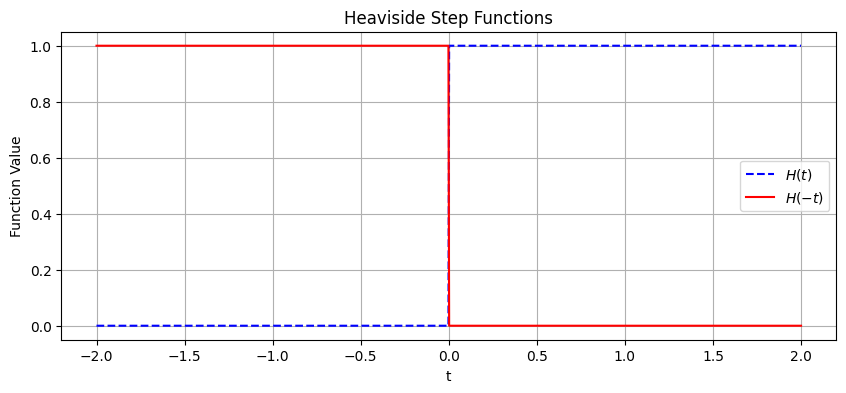

In [126]:
#heaviside functions
t = np.linspace(-2, 2, 1000)

# Define the Heaviside step function
H_t = np.heaviside(t, 1)   # Standard Heaviside H(t)
H_neg_t = np.heaviside(-t, 1)  # Heaviside H(-t)

# Plot the functions
plt.figure(figsize=(10, 4))

plt.plot(t, H_t, label=r'$H(t)$', linestyle='--', color='b')
plt.plot(t, H_neg_t, label=r'$H(-t)$', linestyle='-', color='r')

plt.xlabel('t')
plt.ylabel('Function Value')
plt.title('Heaviside Step Functions')
plt.legend()
plt.grid()
plt.show()


$ e^{-4 |t|} $

$ -e^{-4 |t|}  \cdot Heaviside(-t) + e^{-4 |t|}  \cdot Heaviside(t)$

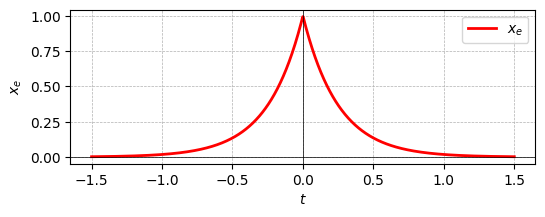

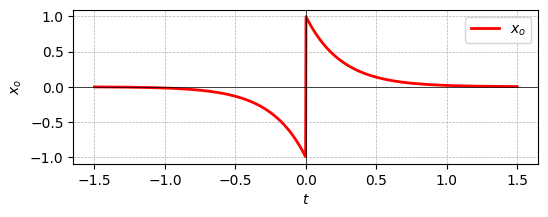

In [127]:
# Define the time range
t = np.linspace(-1.5, 1.5, 1000)

# Define the Heaviside step function
H_t = np.heaviside(t, 1)   # Standard Heaviside H(t)
H_neg_t = np.heaviside(-t, 1)  # Heaviside H(-t)

# Define Xe (even function)
xe = np.exp(-4 * np.abs(t))

# Define Xo (odd function)
# xo = -np.exp(-4 * np.abs(t)) * (t < 0) + np.exp(-4 * np.abs(t)) * (t >= 0)
xo = -np.exp(-4 * np.abs(t)) * H_neg_t + np.exp(-4 * np.abs(t)) * H_t # multiplying by Heaviside(-t) on lhs gives us only values smaller than 0 (t<0)
                                                                      # multiplying by Heaviside(t) on rhs gives us only values greater than 0 (t>=0)

# Plot xe
plt.figure(figsize=(6, 2))
plt.plot(t, xe, 'r', linewidth=2, label=r'$x_e$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.xlabel(r'$t$')
plt.ylabel(r'$x_e$')
plt.legend()
plt.show()

# Plot xo
plt.figure(figsize=(6, 2))
plt.plot(t, xo, 'r', linewidth=2, label=r'$x_o$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.xlabel(r'$t$')
plt.ylabel(r'$x_o$')
plt.legend()
plt.show()

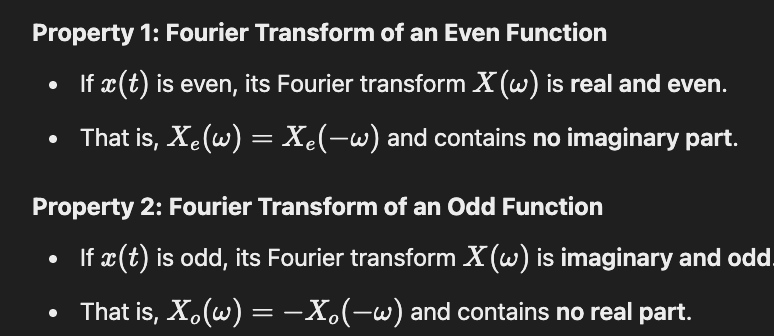

these properties let us to beleive that the fourier transform of xe is going to be real and even,

while xo is gonna be imaginary and odd

$ X_e(ω)$ should be symmetric about $ω=0. $

$ X_o(ω)$ should be assymetric about $ω=0.$ meaning negated for for negative 𝜔

In [128]:
t, w = symbols('t w')

xe = exp(-4 * abs(t))
xo = -exp(-4 * abs(t)) * Heaviside(-t) + exp(-4 * abs(t)) * Heaviside(t)

Xe = fourier_transform(xe, t, w)
Xo = fourier_transform(xo, t, w)

display(simplify(Xe))
display(simplify(Xo))

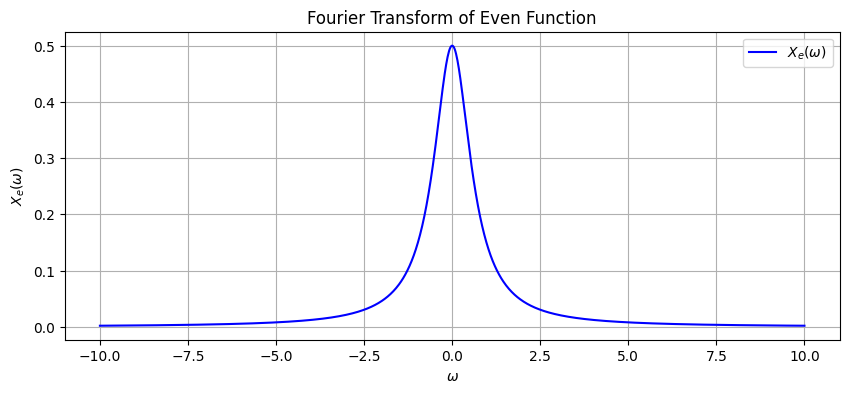

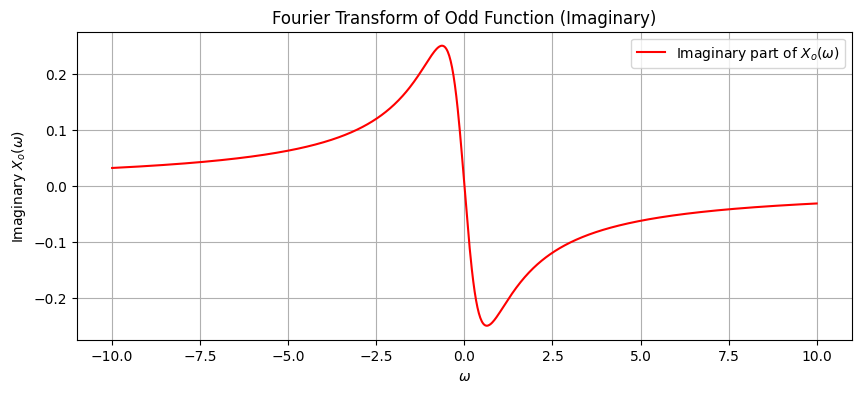

In [129]:
# Convert symbolic expressions to numerical functions
Xe_func = lambdify(w, Xe, 'numpy')
Xo_func_real = lambdify(w, Xo.as_real_imag()[0], 'numpy')  # Real part (should be 0)
Xo_func_imag = lambdify(w, Xo.as_real_imag()[1], 'numpy')  # Imaginary part

# Define the range for w
w_vals = np.linspace(-10, 10, 1000)

# Calculate the values of Xe and Xo
Xe_vals = Xe_func(w_vals)
Xo_vals_imag = Xo_func_imag(w_vals)

# Plot Xe
plt.figure(figsize=(10, 4))
plt.plot(w_vals, Xe_vals, label=r'$X_e(\omega)$', color='b')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$X_e(\omega)$')
plt.title('Fourier Transform of Even Function')
plt.legend()
plt.grid()
plt.show()

# Plot imaginary part of Xo
plt.figure(figsize=(10, 4))
plt.plot(w_vals, Xo_vals_imag, label=r'Imaginary part of $X_o(\omega)$', color='r')
plt.xlabel(r'$\omega$')
plt.ylabel(r'Imaginary $X_o(\omega)$')
plt.title('Fourier Transform of Odd Function (Imaginary)')
plt.legend()
plt.grid()
plt.show()


For an even function, the FT is real  and even.

For an odd function, the FT is imaginary and odd.

# 4.7

plotting transfer function $H(w) = \frac{1}{j w R C + 1} $

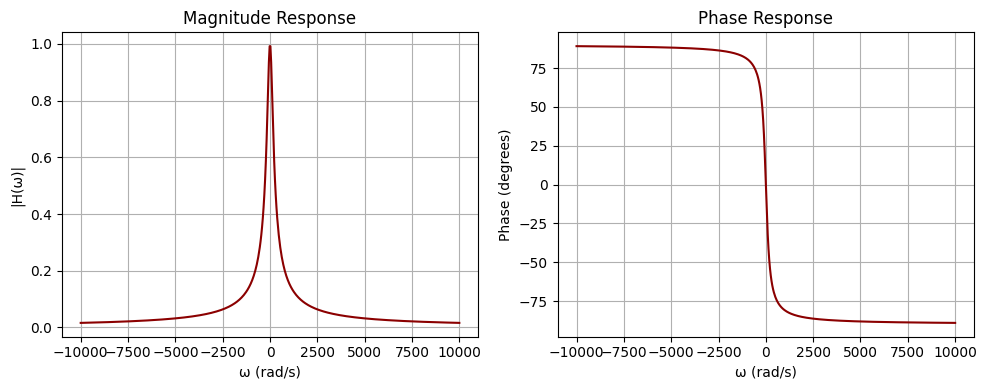

In [130]:
R = 1000  # 1kΩ
C = 1e-6  # 1µF

# Extend frequency range to include negative values
frequencies = np.linspace(-10000, 10000, 500)  # Linear scale from -10k to 10k rad/s
omega = 2 * np.pi * frequencies  # Convert to angular frequency

# Transfer function H(ω)
H = 1 / (1 + 1j * omega * R * C)

# Magnitude and Phase
magnitude = np.abs(H)
phase = np.angle(H, deg=True)  # Convert to degrees

# Plot Magnitude Response
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(frequencies, magnitude, color="darkred")
plt.xlabel("ω (rad/s)")
plt.ylabel("|H(ω)|")
plt.title("Magnitude Response")
plt.grid()

# Plot Phase Response
plt.subplot(1, 2, 2)
plt.plot(frequencies, phase, color="darkred")
plt.xlabel("ω (rad/s)")
plt.ylabel("Phase (degrees)")
plt.title("Phase Response")
plt.grid()

plt.tight_layout()
plt.show()


note!

the linear scale makes it hard to see that this is a first order lowpass filter!

the same plot done in KiCad (gain in green, phase in red) on a semilogarithmic graph

![Screenshot 2025-03-12 at 20.01.25.png](<attachment:Screenshot 2025-03-12 at 20.01.25.png>)
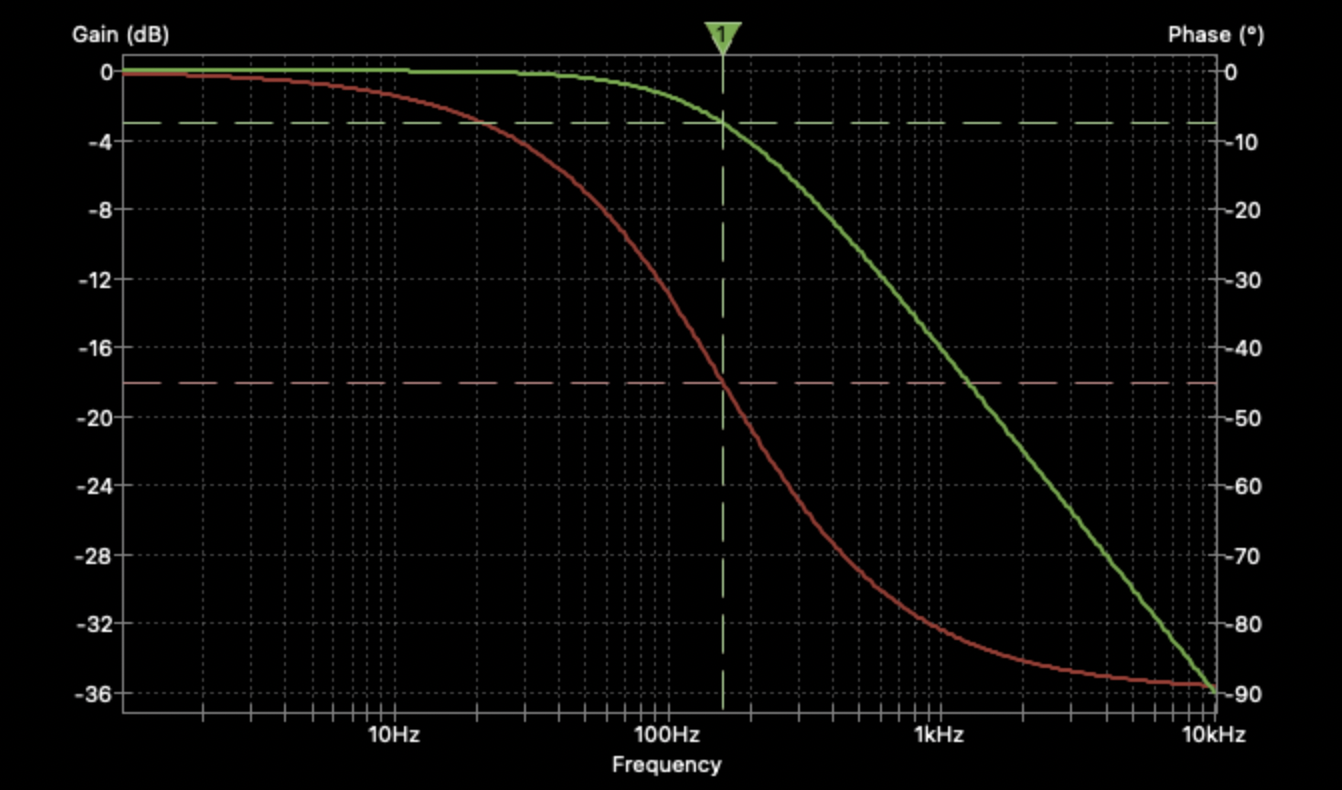

Semilog Plot (Semilogarithmic Plot)

One axis is logarithmic, the other is linear.

Typically used for Bode plots and frequency responses.

In this case, the x-axis (frequency) is logarithmic, while the y-axis (gain in dB) is linear.

# 4.10

inv fourer transform of H(w)

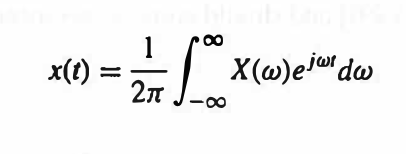

In [131]:
w, t = symbols('w t', real=True)

H_w = 1 / (1 + I * w * R * C)

# Inverse Fourier Transform definition
F_inv_H_w = (1 / (2 * pi)) * integrate(H_w * exp(I * w * t), (w, -oo, oo))

# Print the result
display(F_inv_H_w.simplify())

⎧         -1000.0⋅t            
⎪ 1000.0⋅ℯ            for t > 0
⎪                              
⎪∞                             
⎪⌠                             
⎪⎮       ⅈ⋅t⋅w                 
⎨⎮      ℯ                      
⎪⎮  ───────────── dw           
⎪⎮  0.001⋅ⅈ⋅w + 1              
⎪⌡                             
⎪-∞                            
⎪───────────────────  otherwise
⎩        2⋅π                   

''for t > 0'' $\Leftarrow \Rightarrow$ Heaviside(t)

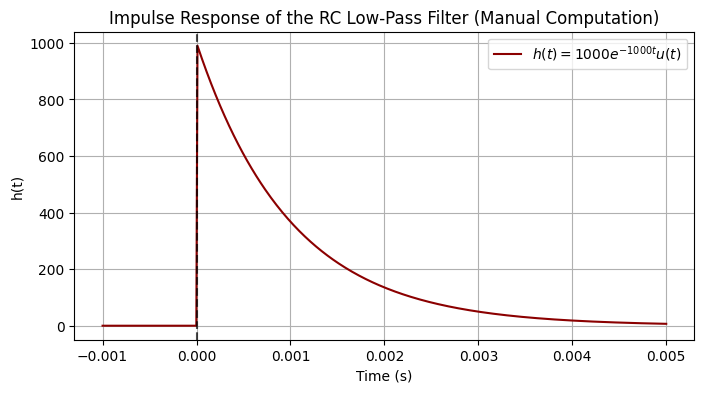

In [132]:
# Define the impulse response using the computed expression from the inverse fourier transform
def h_t(t):
    return 1000.0 * np.exp(-1000.0 * t) * (t > 0)  # Ensuring it's 0 for t < 0

# Time range for plotting
t_vals = np.linspace(-0.001, 0.005, 500)  # From -1ms to 5ms

# Compute h(t) using the manually obtained formula
h_vals = h_t(t_vals)

# Plot the impulse response
plt.figure(figsize=(8, 4))
plt.plot(t_vals, h_vals, label=r'$h(t) = 1000 e^{-1000 t} u(t)$', color='darkred')
plt.axvline(0, color='black', linestyle='--', alpha=0.7)  # Mark t=0
plt.xlabel("Time (s)")
plt.ylabel("h(t)")
plt.title("Impulse Response of the RC Low-Pass Filter (Manual Computation)")
plt.legend()
plt.grid()
plt.show()

### alternative approach

In [133]:
# # Define the theoretical impulse response
# def h_t_func(t, R, C):
#     return (1 / (R * C)) * np.exp(-t / (R * C)) * (t >= 0)  # u(t) ensures it's 0 for t < 0

# # Time range
# t_vals = np.linspace(-0.001, 0.005, 500)  # From -10ms to 50ms

# # Compute h(t)
# # h_vals = h_t_func(t_vals, R, C)
# h_vals = subs(F_inv_H_w, t_vals, R, C)

# # Plot impulse response
# plt.figure(figsize=(8, 4))
# plt.plot(t_vals, h_vals, label=r'$h(t) = \frac{1}{RC} e^{-t/RC} u(t)$', color='darkred')
# plt.axvline(0, color='black', linestyle='--', alpha=0.7)  # Mark t=0
# plt.xlabel("Time (s)")
# plt.ylabel("h(t)")
# plt.title("Impulse Response of the RC Low-Pass Filter")
# plt.legend()
# plt.grid()
# plt.show()

# 4.11 ~ 4.12

replace 1kohm with 500ohm

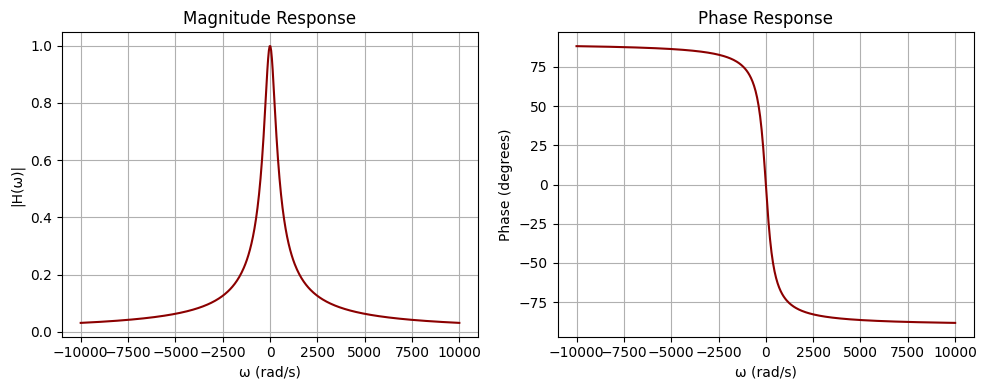

In [134]:
R = 500  # 1kΩ
C = 1e-6  # 1µF

# Extend frequency range to include negative values
frequencies = np.linspace(-10000, 10000, 500)  # Linear scale from -10k to 10k rad/s
omega = 2 * np.pi * frequencies  # Convert to angular frequency

# Transfer function H(ω)
H = 1 / (1 + 1j * omega * R * C)

# Magnitude and Phase
magnitude = np.abs(H)
phase = np.angle(H, deg=True)  # Convert to degrees

# Plot Magnitude Response
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(frequencies, magnitude, color="darkred")
plt.xlabel("ω (rad/s)")
plt.ylabel("|H(ω)|")
plt.title("Magnitude Response")
plt.grid()

# Plot Phase Response
plt.subplot(1, 2, 2)
plt.plot(frequencies, phase, color="darkred")
plt.xlabel("ω (rad/s)")
plt.ylabel("Phase (degrees)")
plt.title("Phase Response")
plt.grid()

plt.tight_layout()
plt.show()


In [135]:
w, t = symbols('w t', real=True)

H_w = 1 / (1 + I * w * R * C)

# Inverse Fourier Transform definition
F_inv_H_w = (1 / (2 * pi)) * integrate(H_w * exp(I * w * t), (w, -oo, oo))

# Print the result
display(F_inv_H_w.simplify())

⎧         -2000.0⋅t             
⎪ 2000.0⋅ℯ             for t > 0
⎪                               
⎪∞                              
⎪⌠                              
⎪⎮       ⅈ⋅t⋅w                  
⎨⎮      ℯ                       
⎪⎮  ────────────── dw           
⎪⎮  0.0005⋅ⅈ⋅w + 1              
⎪⌡                              
⎪-∞                             
⎪────────────────────  otherwise
⎩        2⋅π                    

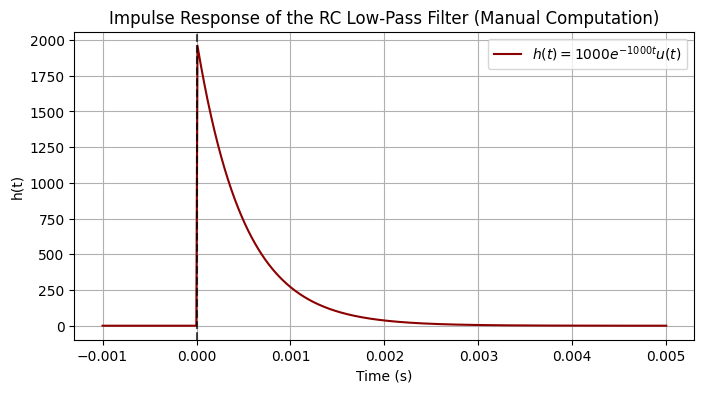

In [136]:
# Define the impulse response using the computed expression from the inverse fourier transform
def h_t(t):
    return 2000.0 * np.exp(-2000.0 * t) * (t > 0)  # Ensuring it's 0 for t < 0

# Time range for plotting
t_vals = np.linspace(-0.001, 0.005, 500)  # From -1ms to 5ms

# Compute h(t) using the manually obtained formula
h_vals = h_t(t_vals)

# Plot the impulse response
plt.figure(figsize=(8, 4))
plt.plot(t_vals, h_vals, label=r'$h(t) = 1000 e^{-1000 t} u(t)$', color='darkred')
plt.axvline(0, color='black', linestyle='--', alpha=0.7)  # Mark t=0
plt.xlabel("Time (s)")
plt.ylabel("h(t)")
plt.title("Impulse Response of the RC Low-Pass Filter (Manual Computation)")
plt.legend()
plt.grid()
plt.show()


making R1 half the size has given the impulse respnse twice the amplitude

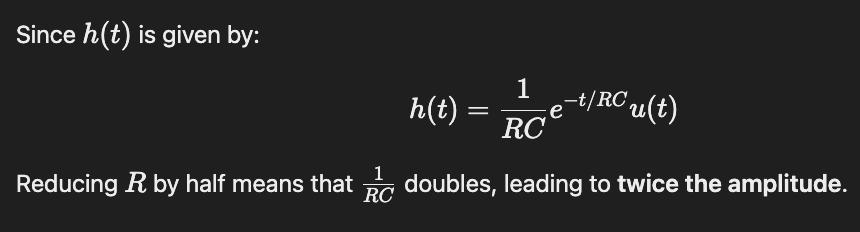

and makes it decay twice as fast as well

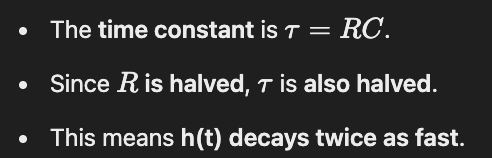

and the cutoff frequency doubles

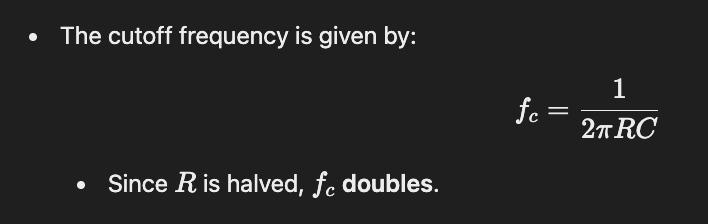

and the phase drop happens faster

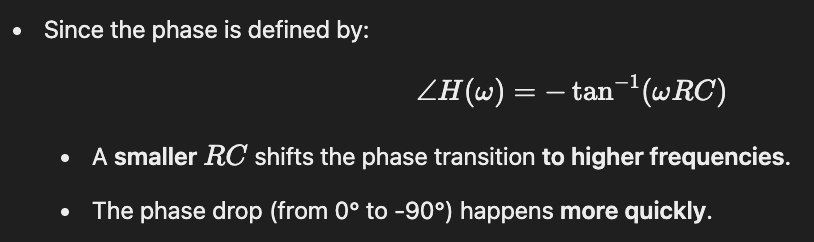

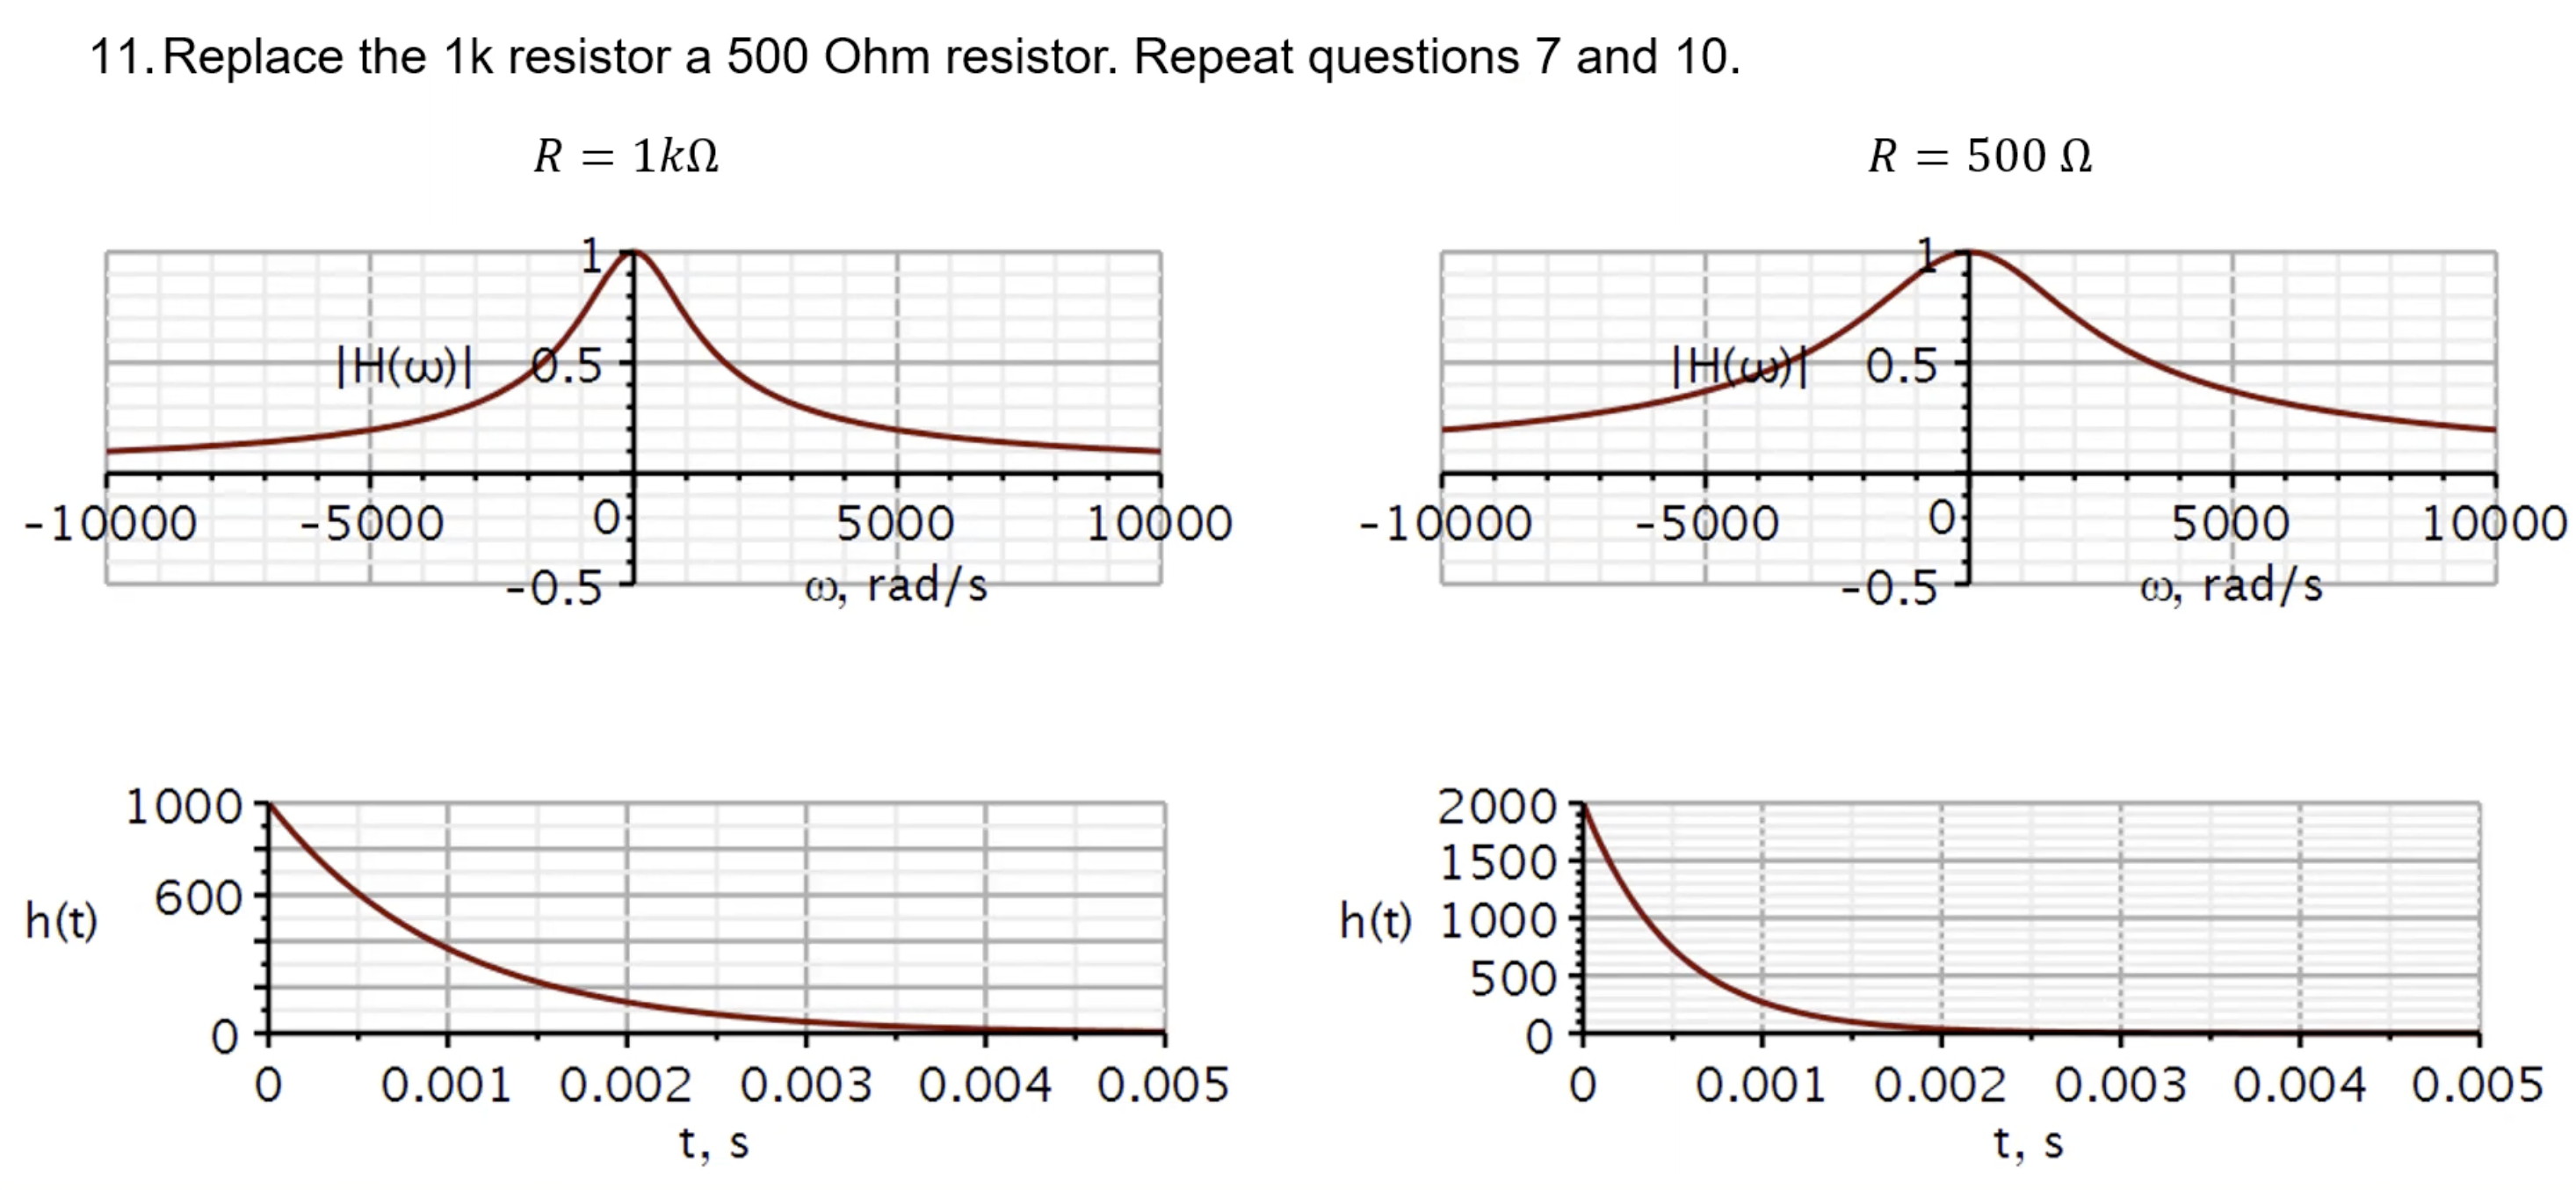

# 4.13

plotting time delay as a function of frequency

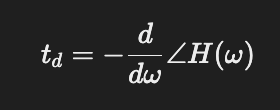

In [137]:
w, R, C, f = symbols('w R C f', real=True)

# H(w) = 1 / (1 + jwRC) ---> H(w) = 1 / (a + jb)
b = w*R*C
a = 1

t_d = - diff(-atan(b/a), w)
t_d_func = t_d.subs({R: 1000, C: 1e-6, w: 2*pi*f})
t_d_func

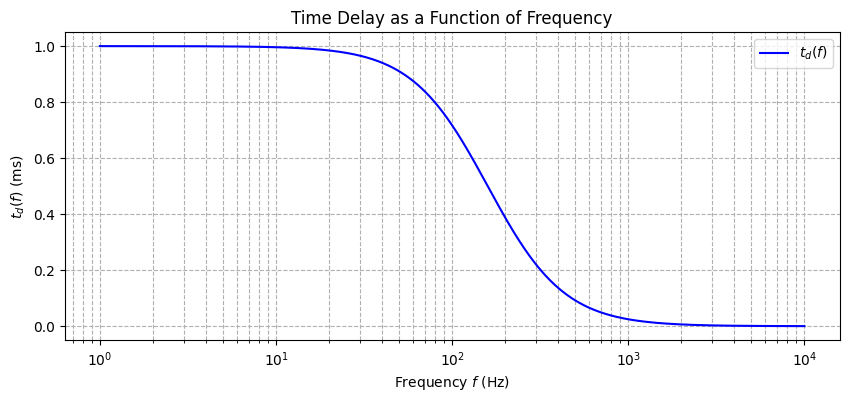

In [138]:
# lamdify to get the function in terms of f instead of w
t_d_func = lambdify(f, t_d.subs({w: 2 * np.pi * f, R: 1000, C: 1e-6}), 'numpy')

# Define a logarithmic range of frequencies
f_vals = np.logspace(0, 4, 500)  # From 1 Hz to 10 kHz

# Calculate the values of t_d for the given range of f
t_d_vals = t_d_func(f_vals)
t_d_vals *= 1e3 # Convert to milliseconds

# Plot time delay vs frequency
plt.figure(figsize=(10, 4))
plt.plot(f_vals, t_d_vals, label=r'$t_d(f)$', color='blue')
plt.xscale('log')  # Logarithmic x-axis
plt.xlabel(r'Frequency $f$ (Hz)')
plt.ylabel(r'$t_d(f)$ (ms)')
plt.title("Time Delay as a Function of Frequency")
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()